In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import pandas as pd

df = pd.read_csv("Restaurant_Reviews.tsv",delimiter = "\t", quoting = 3)
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Eww,0
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1


In [2]:
df.groupby('Liked').describe()

Review                                      
       count unique                       top freq
Liked                                             
0        257    256        Not recommended.      2
1        298    298  Wow... Loved this place.    1

In [3]:
df['Liked'].value_counts()

1    298
0    257
Name: Liked, dtype: int64

In [4]:
def determine_happiness(value):
    return 'happy' if value == 1 else 'not happy'

# Add a new column 'happiness'
df['happiness'] = df['Liked'].apply(determine_happiness)
df.head()

,Review,Liked,happiness
0,Wow... Loved this place.,1,happy
1,Eww,0,not happy
2,Crust is not good.,0,not happy
3,Not tasty and the texture was just nasty.,0,not happy
4,Stopped by during the late May bank holiday of...,1,happy


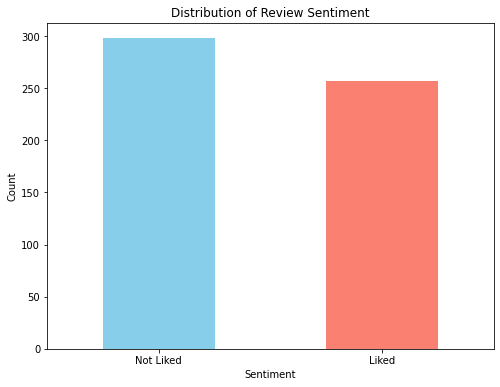

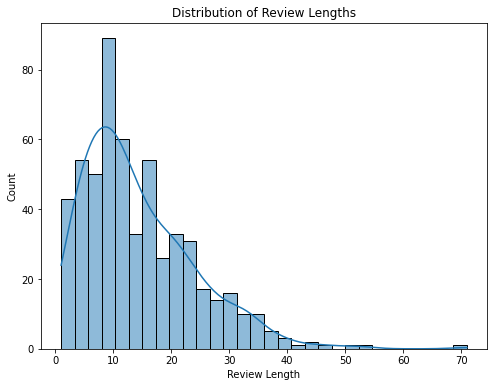

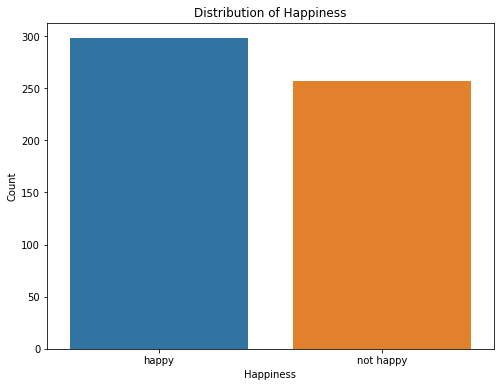

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
df['Liked'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Liked', 'Liked'], rotation=0)
plt.show()


# Visualize the distribution of review lengths
review_lengths = df['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'happiness' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='happiness')
plt.title('Distribution of Happiness')
plt.xlabel('Happiness')
plt.ylabel('Count')
plt.show()


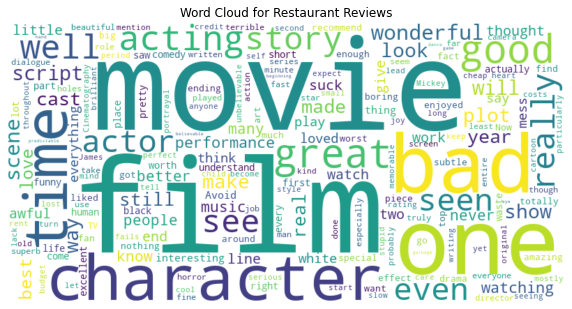

In [13]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Restaurant Reviews')
plt.axis('off')
plt.show()


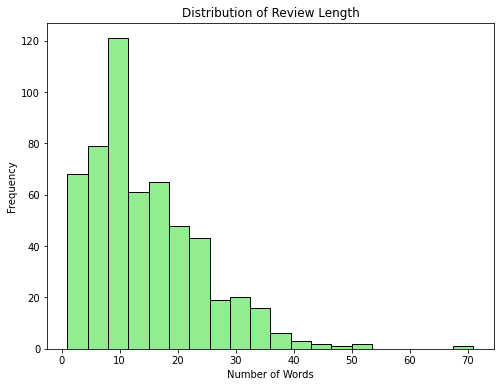

In [10]:
# Calculate the length of each review (number of words)
review_lengths = df['Review'].apply(lambda x: len(x.split()))

# Plot the histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


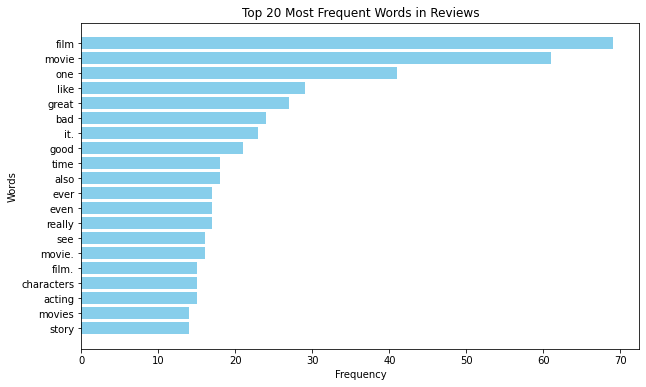

In [14]:
from collections import Counter
from nltk.corpus import stopwords

# Tokenize the reviews
tokens = ' '.join(df['Review']).split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Select the top 20 most frequent words
top_words = word_counts.most_common(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to display most frequent words at the top
plt.show()


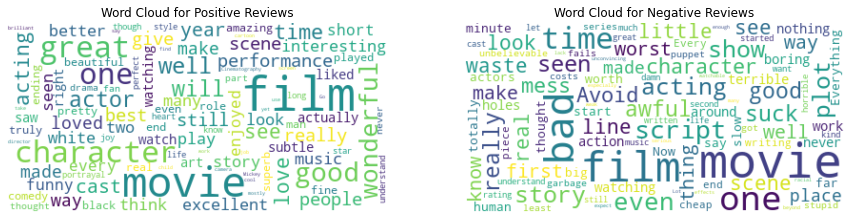

In [17]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = " ".join(review for review, sentiment in zip(df['Review'], df['happiness']) if sentiment == 'happy')
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)

# Generate word cloud for negative reviews
negative_reviews = " ".join(review for review, sentiment in zip(df['Review'], df['happiness']) if sentiment == 'not happy')
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()


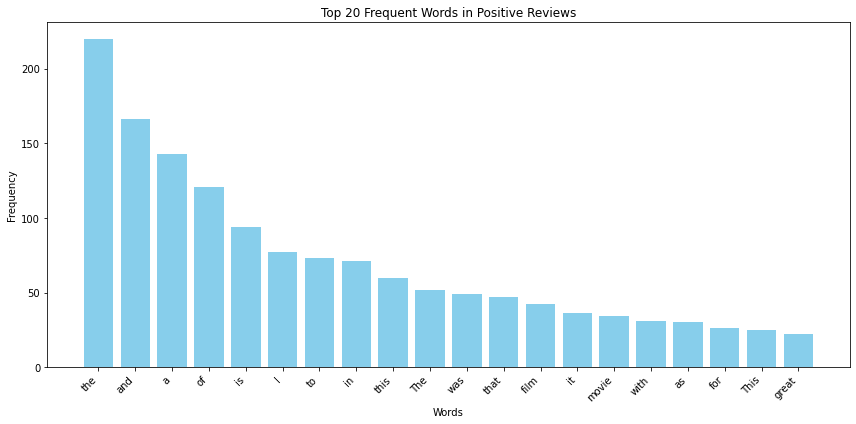

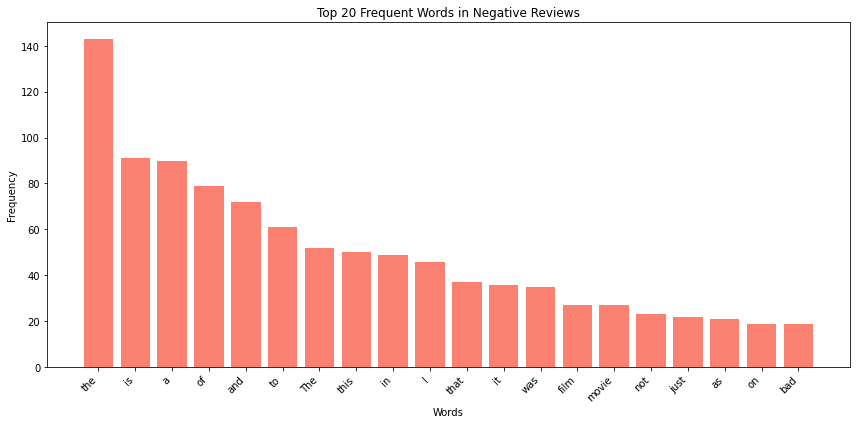

In [18]:
from collections import Counter

# Tokenize positive and negative reviews
positive_tokens = " ".join(review for review, sentiment in zip(df['Review'], df['happiness']) if sentiment == 'happy').split()
negative_tokens = " ".join(review for review, sentiment in zip(df['Review'], df['happiness']) if sentiment == 'not happy').split()

# Count the frequency of each word
positive_word_freq = Counter(positive_tokens)
negative_word_freq = Counter(negative_tokens)

# Get top 20 frequent words
top_positive_words = positive_word_freq.most_common(20)
top_negative_words = negative_word_freq.most_common(20)

# Plot top 20 frequent words for positive reviews
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_positive_words], [count[1] for count in top_positive_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Frequent Words in Positive Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot top 20 frequent words for negative reviews
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_negative_words], [count[1] for count in top_negative_words], color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Frequent Words in Negative Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
